In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans,MiniBatchKMeans

# **CLUSTERING**

# **K-Means**

In [9]:
                            #generate blob of data

blob_centers=np.array([
                       [0.2,2.3],
                       [-1.5,2.3],
                       [-2.8,1.8],
                       [-2.8,2.8],
                       [-2.8,1.3]
])
blob_std=np.array([0.4,0.3,0.1,0.1,0.1])      #standard deviation of the clusters(how deviated should be data from centroid


X,y=make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std,random_state=7)

print(X)
print(y)

[[-2.69823941  1.3454702 ]
 [-2.87459835  1.8097575 ]
 [ 0.96077126  1.17046777]
 ...
 [-2.80303543  2.72948115]
 [ 0.24057359  2.40103109]
 [-2.63807768  1.95621065]]
[4 2 0 ... 3 0 2]


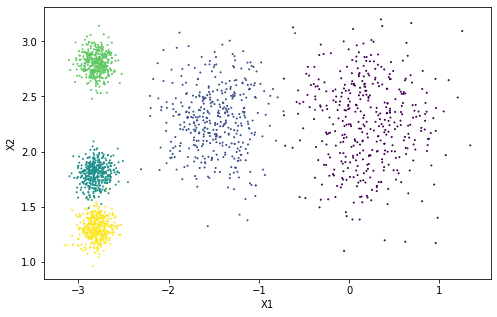

In [15]:
                          #plot the data (x1 and x2)

plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],c=y,s=1)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [20]:
                                     #fit and train using kmeans
k=5
kmeans=KMeans(n_clusters=k)
y_pred=kmeans.fit_predict(X)

In [21]:
print(y_pred)        #returns the label in which the data belongs

[4 0 1 ... 3 1 0]


In [22]:
print(kmeans.labels_)  #preserves the label in kmeans (equal to y_pred)

[4 0 1 ... 3 1 0]


In [23]:
kmeans.cluster_centers_ 

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [24]:
X_new=np.array([
                [0,2],
                [3,2],
                [-3,3],
                [-3,2.5]

])

kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

In [26]:
kmeans.transform(X_new)   #gives the distance from each instance to every centroid

array([[2.81093633, 0.32995317, 1.49439034, 2.9042344 , 2.88633901],
       [5.80730058, 2.80290755, 4.4759332 , 5.84739223, 5.84236351],
       [1.21475352, 3.29399768, 1.69136631, 0.29040966, 1.71086031],
       [0.72581411, 3.21806371, 1.54808703, 0.36159148, 1.21567622]])

### **Centroid** **Initialization** **Method**

In [27]:
#first way

good_init=np.array([
                    [-3,3],[-3,2],[-3,1],[-1,2],[0,2]
])
kmeans=KMeans(n_clusters=5,init=good_init,n_init=1)

In [29]:
#second way
kmeans=KMeans(n_clusters=5,init="random",n_init=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [30]:
kmeans.inertia_

211.5985372581684

In [32]:
kmeans.score(X)

-211.59853725816856

In [ ]:
#third way
#k-means ++ which is by default used by the kmeans

### **Accelerated and mini-batch k-means**

In [33]:
#Accelerated kmeans is used by default by sklearn KMeans class

In [35]:
#mini-batch k-means
minibatch_kmeans=MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit_predict(X)

array([4, 2, 1, ..., 3, 1, 2], dtype=int32)